<a href="https://colab.research.google.com/github/Teju501/Demand-Prediction/blob/main/regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Demand_Prediction.csv')
df.head()

,Product_ID,Product_Category,Price,Stock_Available,Region,Season,Marketing_Spend,Previous_Sales,Demand
0,519fd7f0-e577-4a34-80f5-dbd95335da06,Clothing,442.043024,473.0,West,Spring,8418.955643,616,528
1,0008f293-e264-48c2-9e1d-657970afb173,Groceries,924.461639,15.0,West,Fall,41548.907437,928,337
2,0dca84a1-9406-4de7-aff8-5775f0c58320,Electronics,546.290772,241.0,North,Spring,49586.549327,859,661
3,ff95bbe7-4852-40a8-9703-070aa72c5647,Furniture,291.192089,305.0,East,Spring,33176.109812,199,555
4,bb8b3167-b24b-4f27-ac9f-80f58102e1a6,Furniture,605.371483,245.0,South,Summer,37954.814848,574,82


In [5]:
# See the no. of rows and columns
df.shape

(899, 9)

In [6]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Product_ID', 'Product_Category', 'Price', 'Stock_Available', 'Region', 'Season', 'Marketing_Spend', 'Previous_Sales', 'Demand']


In [7]:
# Display data type of each feature
df.dtypes

,0
Product_ID,object
Product_Category,object
Price,float64
Stock_Available,float64
Region,object
Season,object
Marketing_Spend,float64
Previous_Sales,int64
Demand,int64


In [8]:
df.describe()

,Price,Stock_Available,Marketing_Spend,Previous_Sales,Demand
count,802.000000,845.000000,849.000000,899.000000,899.000000
mean,500.783244,252.153846,25669.082205,500.650723,492.007786
std,280.054144,141.814319,14166.255749,288.354826,289.337121
min,13.757706,0.000000,1124.513101,1.000000,0.000000
25%,272.313669,137.000000,12826.975940,252.500000,236.000000
50%,495.969543,253.000000,26130.437083,502.000000,494.000000
75%,745.739415,371.000000,37984.417616,741.000000,747.500000
max,996.958311,496.000000,49937.923697,999.000000,999.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        899 non-null    object 
 1   Product_Category  899 non-null    object 
 2   Price             802 non-null    float64
 3   Stock_Available   845 non-null    float64
 4   Region            899 non-null    object 
 5   Season            899 non-null    object 
 6   Marketing_Spend   849 non-null    float64
 7   Previous_Sales    899 non-null    int64  
 8   Demand            899 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 63.3+ KB


In [10]:
# find the null values
df.isnull().sum()

,0
Product_ID,0
Product_Category,0
Price,97
Stock_Available,54
Region,0
Season,0
Marketing_Spend,50
Previous_Sales,0
Demand,0


In [11]:
# Remove unwanted columns
df.drop(columns=['Product_ID'], inplace=True)  # specify the columns to remove

In [15]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

num_columns
cat_columns

Index(['Product_Category', 'Region', 'Season'], dtype='object')

In [16]:
num_columns

Index(['Price', 'Stock_Available', 'Marketing_Spend', 'Previous_Sales',
       'Demand'],
      dtype='object')

In [14]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [18]:
df.isnull().sum()

,0
Product_Category,0
Price,0
Stock_Available,0
Region,0
Season,0
Marketing_Spend,0
Previous_Sales,0
Demand,0


In [19]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [20]:
# find the null values
df.isnull().sum()

,0
Product_Category,0
Price,0
Stock_Available,0
Region,0
Season,0
Marketing_Spend,0
Previous_Sales,0
Demand,0


In [25]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [26]:
df.head()

,Product_Category,Price,Stock_Available,Region,Season,Marketing_Spend,Previous_Sales,Demand
0,0,0.435603,0.953629,3,1,0.149435,0.616232,0.528529
1,3,0.926265,0.030242,3,0,0.828141,0.928858,0.337337
2,1,0.541632,0.485887,1,1,0.992802,0.859719,0.661662
3,2,0.282175,0.614919,0,1,0.656615,0.198397,0.555556
4,2,0.601722,0.493952,2,2,0.754512,0.574148,0.082082


In [22]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [23]:
df.head()

,Product_Category,Price,Stock_Available,Region,Season,Marketing_Spend,Previous_Sales,Demand
0,0,0.435603,0.953629,3,1,0.149435,0.616232,0.528529
1,3,0.926265,0.030242,3,0,0.828141,0.928858,0.337337
2,1,0.541632,0.485887,1,1,0.992802,0.859719,0.661662
3,2,0.282175,0.614919,0,1,0.656615,0.198397,0.555556
4,2,0.601722,0.493952,2,2,0.754512,0.574148,0.082082


In [27]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Demand', axis=1)  # -- independent variable
y = df['Demand'] # -- dependent variable

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [32]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.0918328990273806
Mean Absolute Error: 0.26345663114261486
R-squared: -0.03338842719218316


In [33]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [35]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.09688246121608207
Mean Absolute Error: 0.2697084306528751
R-squared: -0.09021075539327272


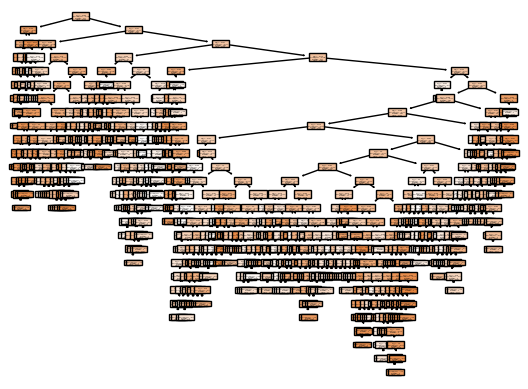

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [36]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [37]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
